# Admission prediction 

About Dataset
Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [2]:
data=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(500, 9)


As we seen there is no null values as well as no duplicates found so lets move further.

In [5]:
# As we saw there are some gap found in below two featurs so lets first remane the same and start our work
data.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [6]:
data. columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

# Statistical Summary

In [7]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# first lets drop the unnecessary columns
data.drop(columns='Serial No.', axis=1, inplace=True)

In [9]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


# Data Visualization

# Univariate Plots

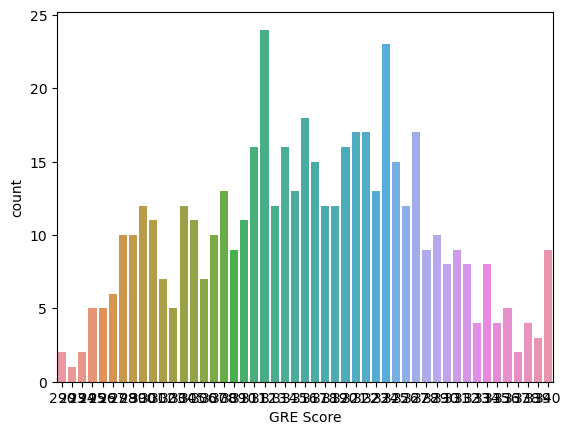

293     1
290     2
294     2
337     2
339     3
338     4
333     4
335     4
303     5
336     5
296     5
295     5
297     6
302     7
306     7
332     8
330     8
334     8
328     9
331     9
309     9
340     9
298    10
329    10
307    10
299    10
310    11
301    11
305    11
313    12
326    12
300    12
318    12
319    12
304    12
308    13
323    13
315    13
317    15
325    15
320    16
314    16
311    16
322    17
321    17
327    17
316    18
324    23
312    24
Name: GRE Score, dtype: int64


In [10]:
#plot each class frequency
sns.countplot(x='GRE Score',data=data)
plt.show()
print(data['GRE Score'].value_counts(ascending=True))

From graph we can see the maximum 23 & 24 student has got 324 & 312 GRE score.

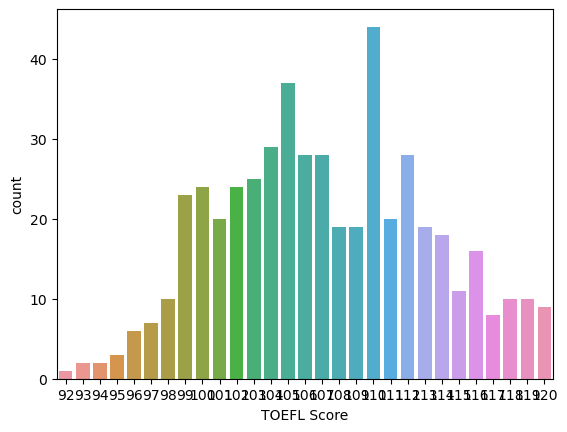

110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64


In [11]:
#plot each class frequency
sns.countplot(x='TOEFL Score',data=data)
plt.show()
print(data['TOEFL Score'].value_counts())

From graph we can see the maximum 44 student has got 110 TOFEL score.

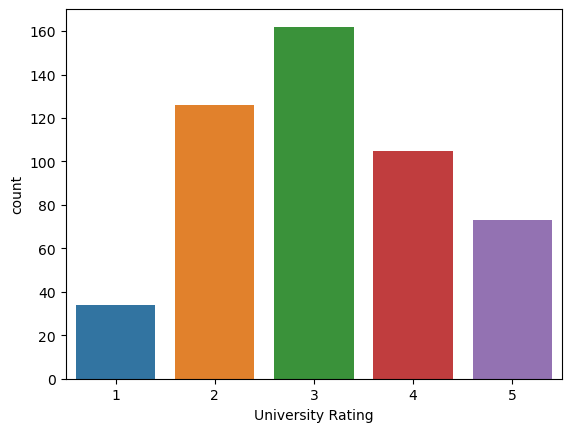

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


In [12]:
#plot each class frequency
sns.countplot(x='University Rating',data=data)
plt.show()
print(data['University Rating'].value_counts())

ther are almost 162 university's how hvae 3 star. and the count of 4 and 5 star is less.

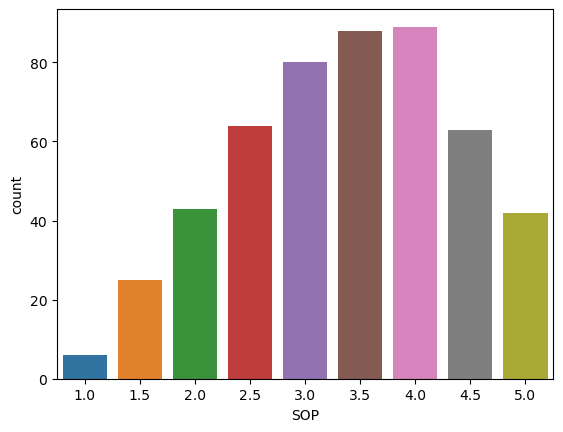

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


In [13]:
#plot each class frequency
sns.countplot(x='SOP',data=data)
plt.show()
print(data['SOP'].value_counts())

from graph we cam see the count of Statement of Purpose and Letter of Recommendation Strength ( out of 5 ). So, the maximum rating is 4 with count of 89.

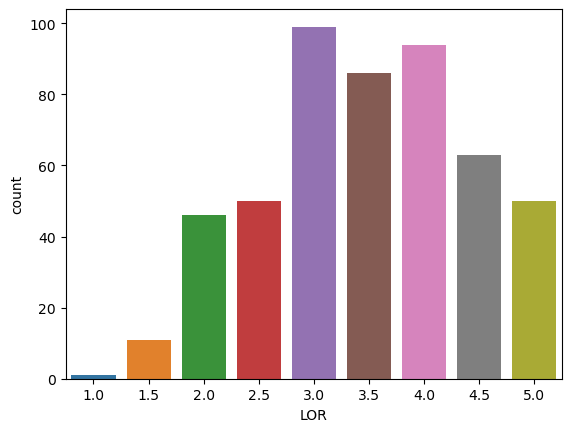

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


In [14]:
#plot each class frequency
sns.countplot(x='LOR',data=data)
plt.show()
print(data['LOR'].value_counts())

From graph we can see taht count of LOR 3 is more than the others.

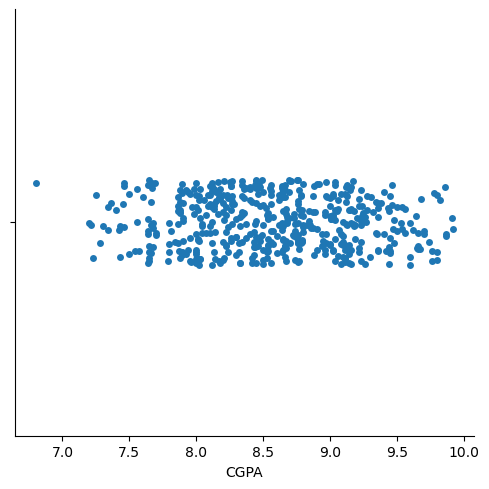

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64


In [15]:
#plot each class frequency
sns.catplot(x='CGPA',data=data)
plt.show()
print(data['CGPA'].value_counts())

As we seen the CGPA rate is in between 7 to 10.

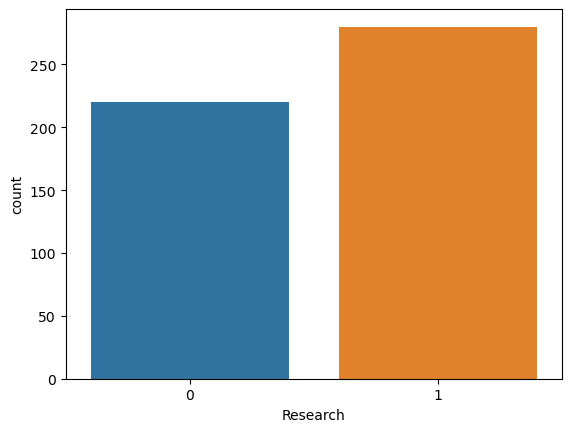

1    280
0    220
Name: Research, dtype: int64


In [16]:
#plot each class frequency
sns.countplot(x='Research',data=data)
plt.show()
print(data['Research'].value_counts())

the maximum count of Research Experience is 1

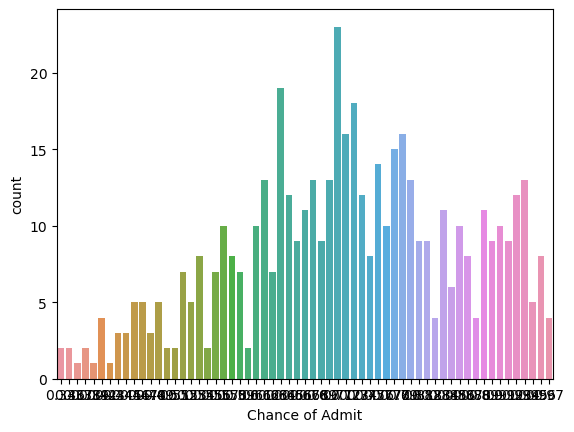

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit, Length: 61, dtype: int64


In [17]:
#plot each class frequency
sns.countplot(x='Chance of Admit',data=data)
plt.show()
print(data['Chance of Admit'].value_counts())

from count we can see that the minimum percentage of Chance of Admit if 37% and maximum is 97%.

But as we want to know that admission will happen or not so lets convert our target column into 0 to 1 or we can say into binary output.
So, lets convert below 40% of admission of chance consider as o class and above that 1 class mean you get the admission.

In [18]:
data['Chance_of_admit']=[0 if x<=0.50 else 1 for x in data['Chance of Admit']]

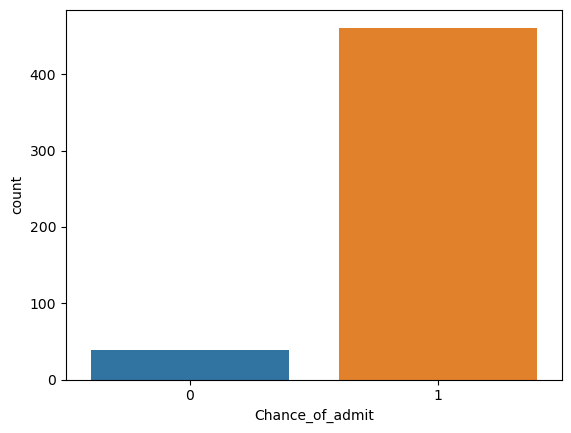

1    461
0     39
Name: Chance_of_admit, dtype: int64


In [19]:
#plot each class frequency
sns.countplot(x='Chance_of_admit',data=data)
plt.show()
print(data['Chance_of_admit'].value_counts())

as we see there is data imbalance so lets use SMOTE.

In [20]:
#lets Drop the old column
data.drop(columns='Chance of Admit', axis=1, inplace=True)

In [21]:
data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1


<Figure size 1500x600 with 0 Axes>

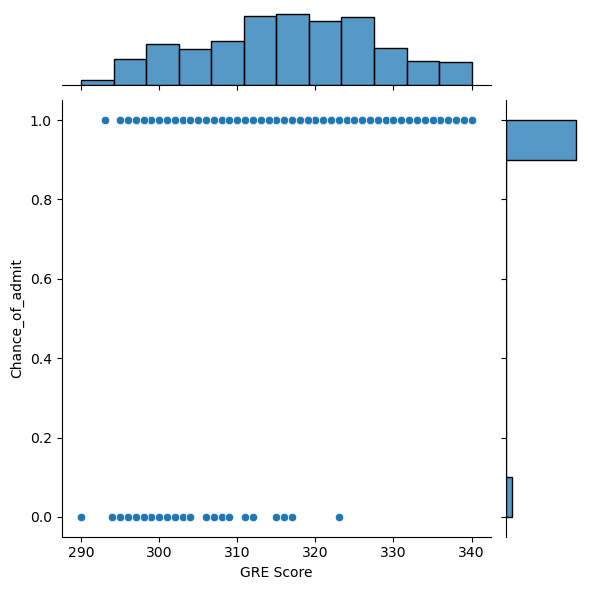

In [22]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.jointplot(y ='Chance_of_admit', x ='GRE Score', data = data)
plt.show()









as we seen as ther GRE Score incrested the chance of admission will increased.

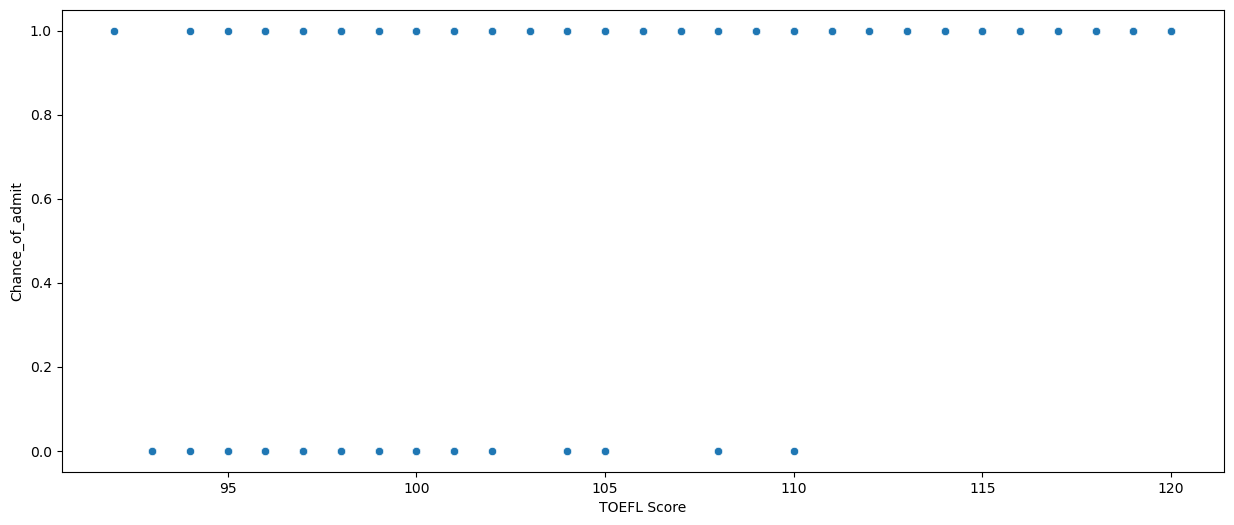

In [23]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Chance_of_admit', x ='TOEFL Score', data = data)
plt.show()

as we seen as ther TOFEL Score incrested the chance of admission will increased.

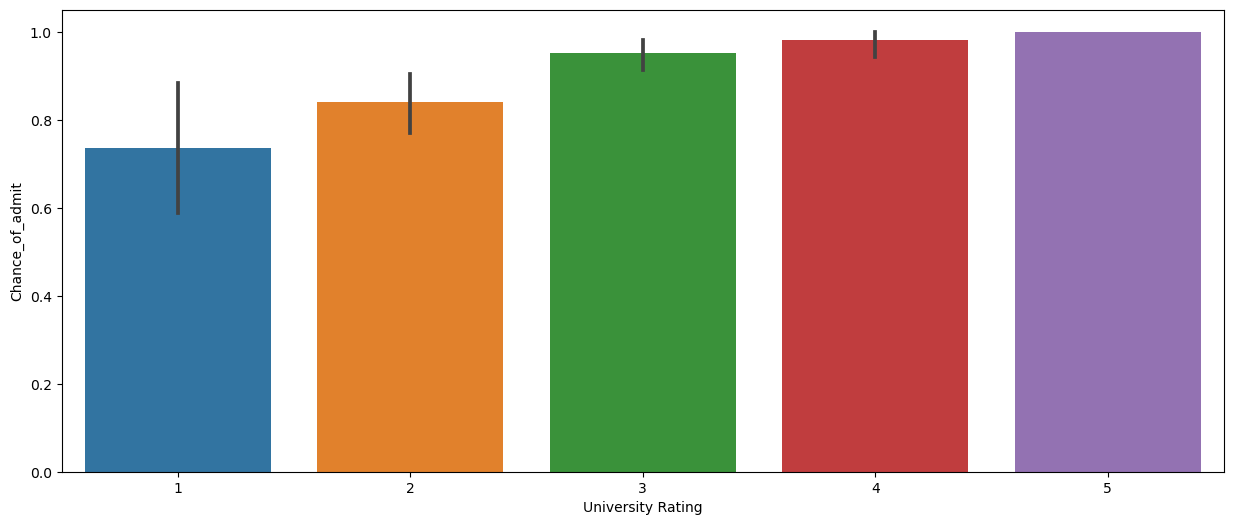

In [24]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='University Rating', data = data)
plt.show()

As we seen the maximum rating has the maximum admissions.

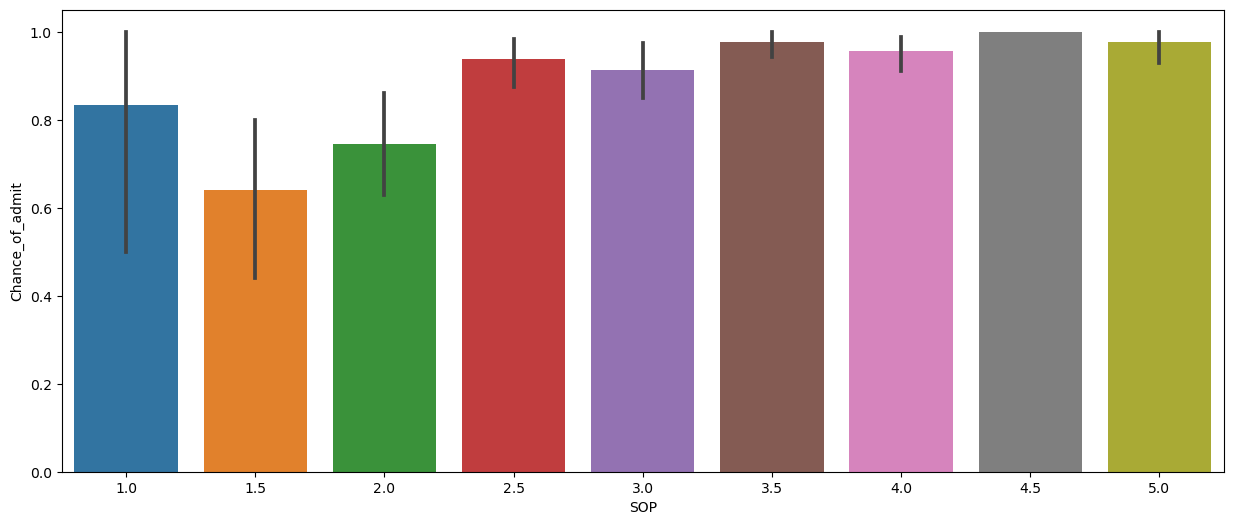

In [25]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='SOP', data = data)
plt.show()

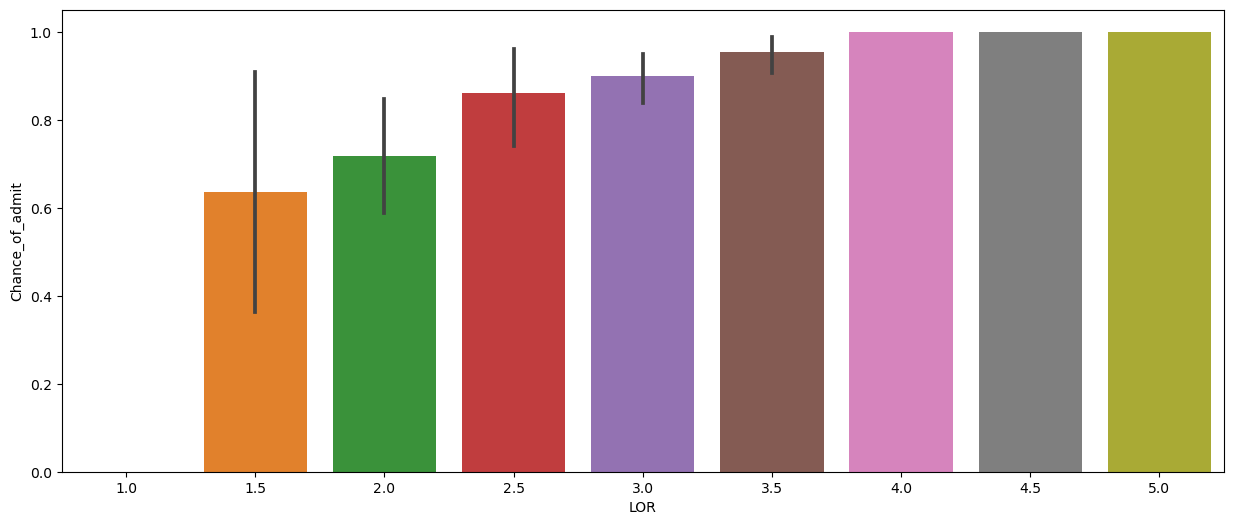

In [26]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='LOR', data = data)
plt.show()

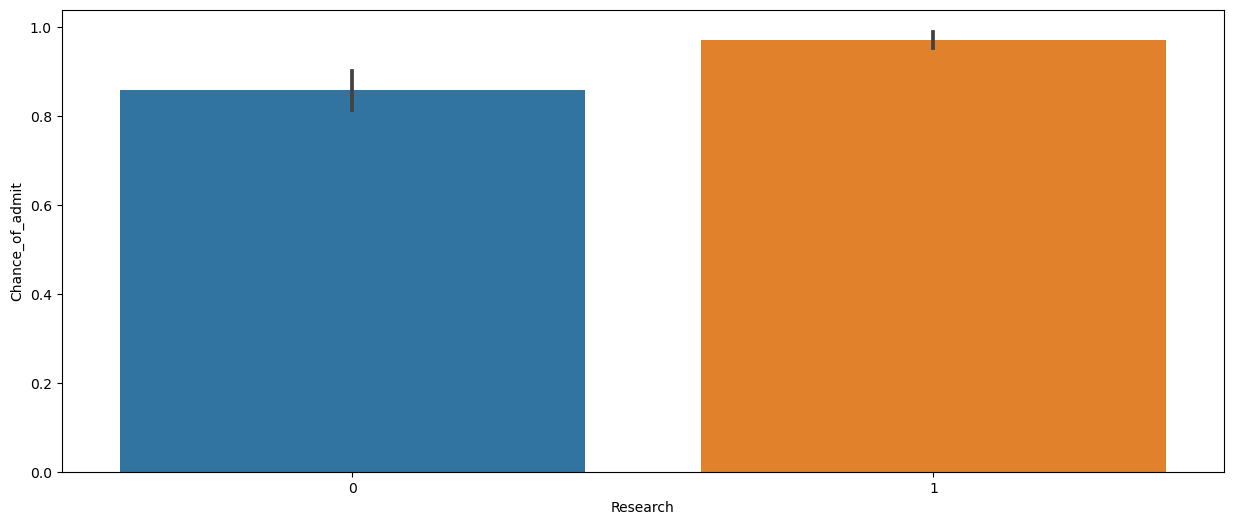

In [27]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='Research', data = data)
plt.show()

Chance of admission is more in research 1.

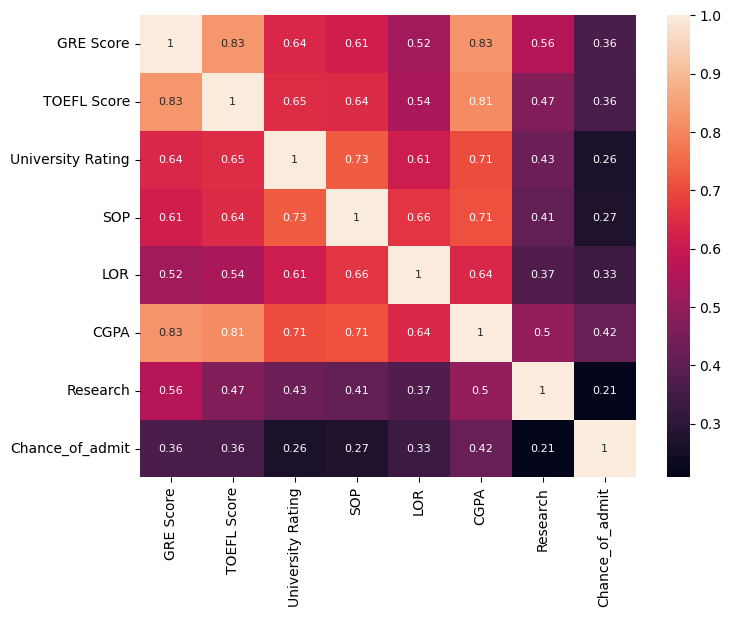

In [28]:
#check multicolinearity
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':8})
plt.show()

from above heatmap we can see there is no multicolinarity.

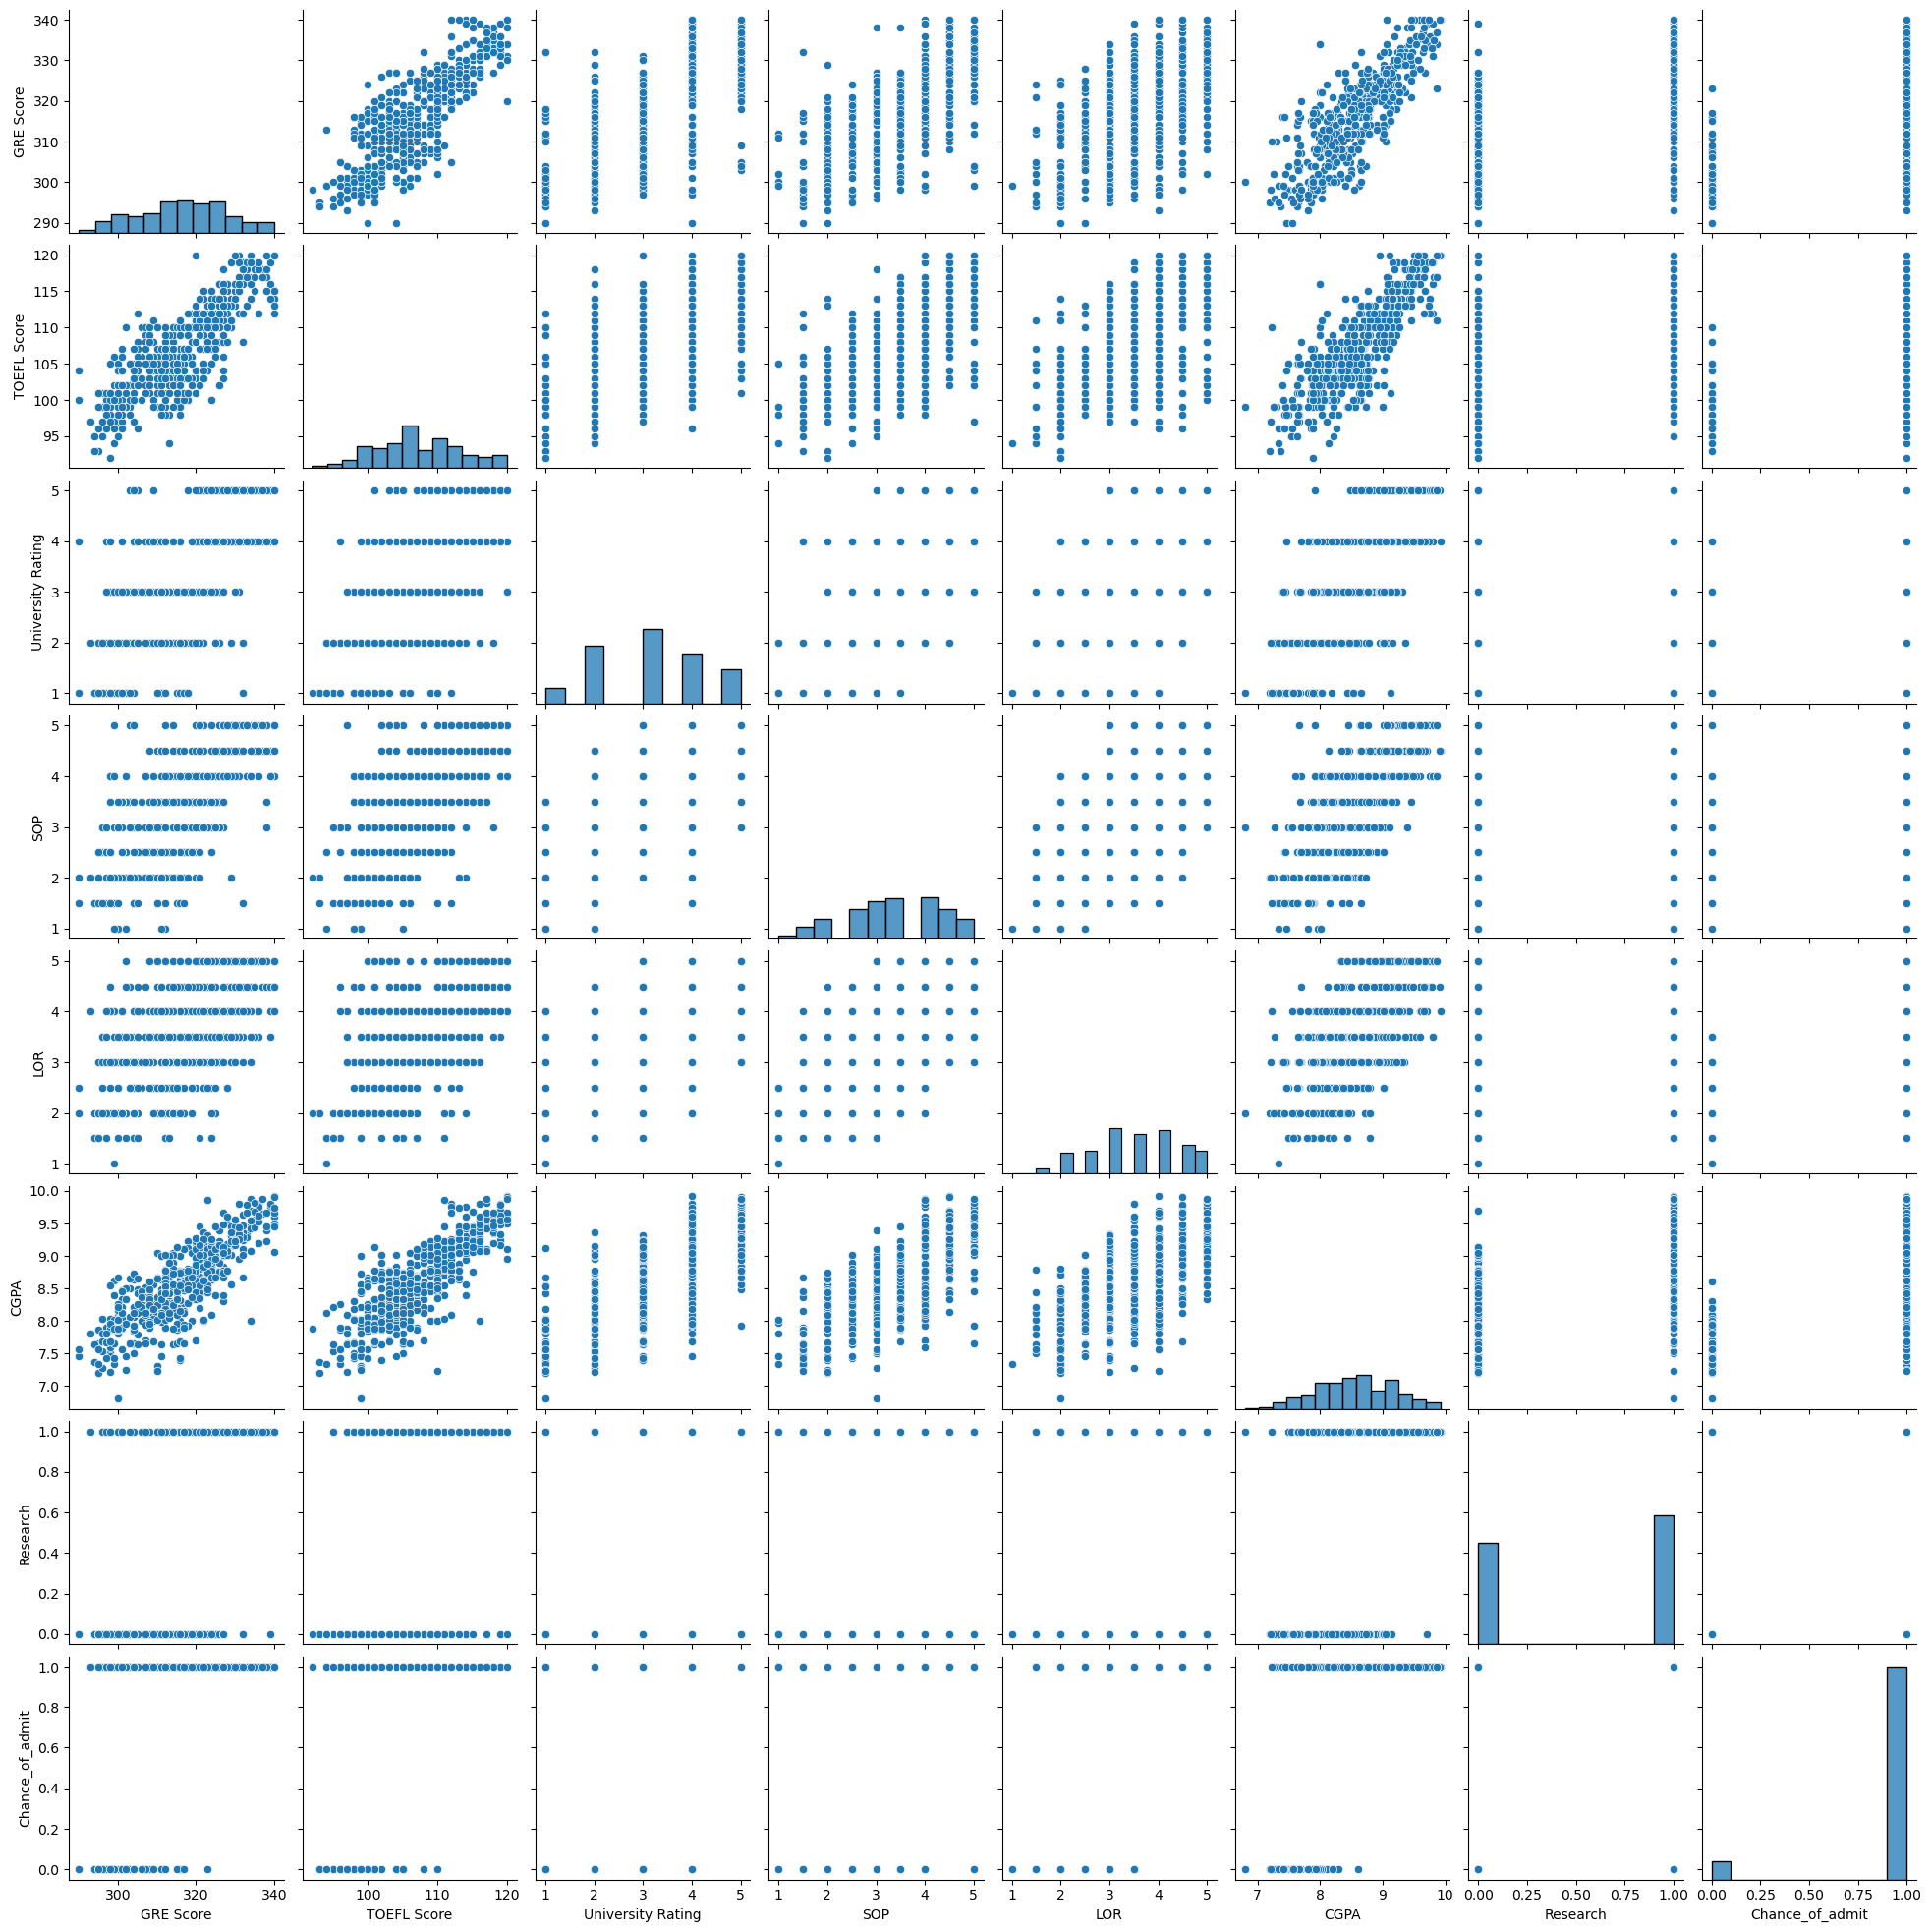

In [29]:
sns.pairplot(data)
plt.show()

from graph we can see there are almost all the columns have strong relationship with target variable.

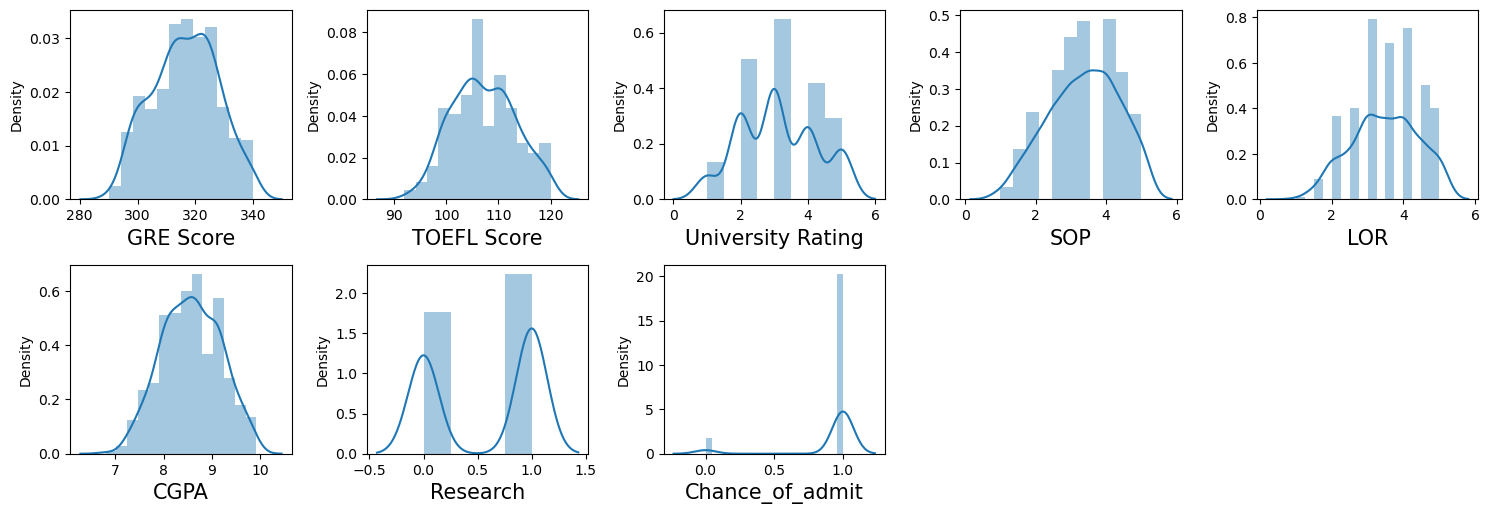

In [30]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From distribusion we can see there is now skewness in dataset so lets check for the outliers.

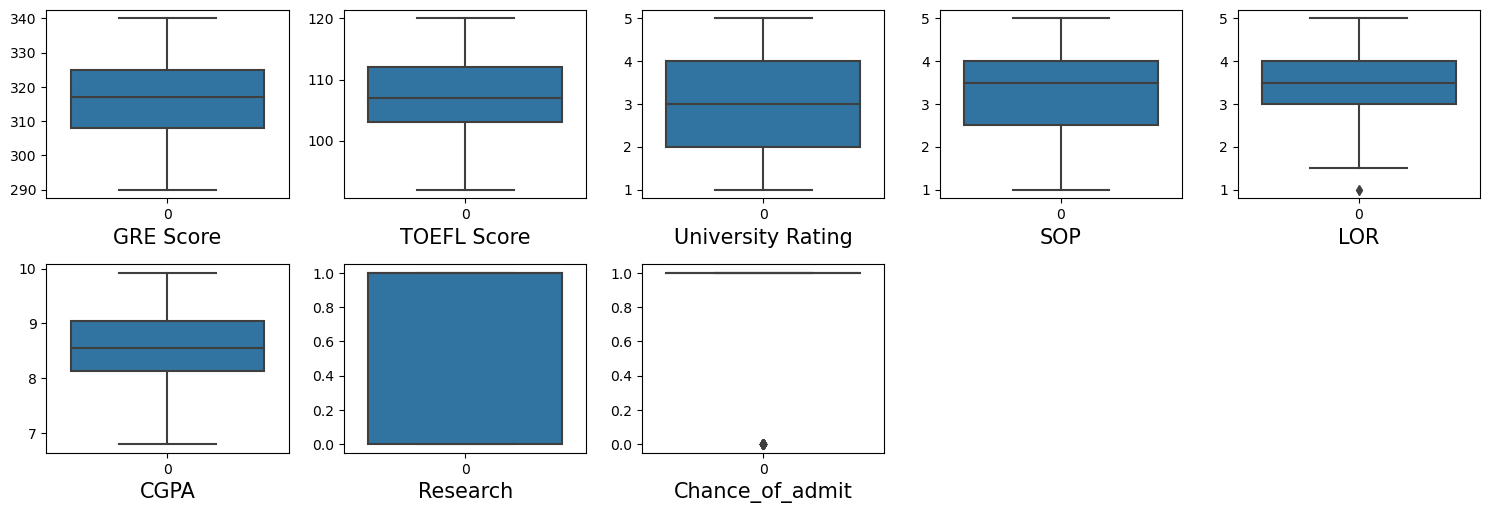

In [31]:
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

from graph we can see there is outliers present in the colunms LOR so lets deal with it by zscore.

In [32]:
# Separate the outliers columns
df1=['LOR']

In [33]:
from scipy.stats import zscore
z_score=zscore(data[df1])
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)
data=data[filter_entry]
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1


In [34]:
data.shape

(500, 8)

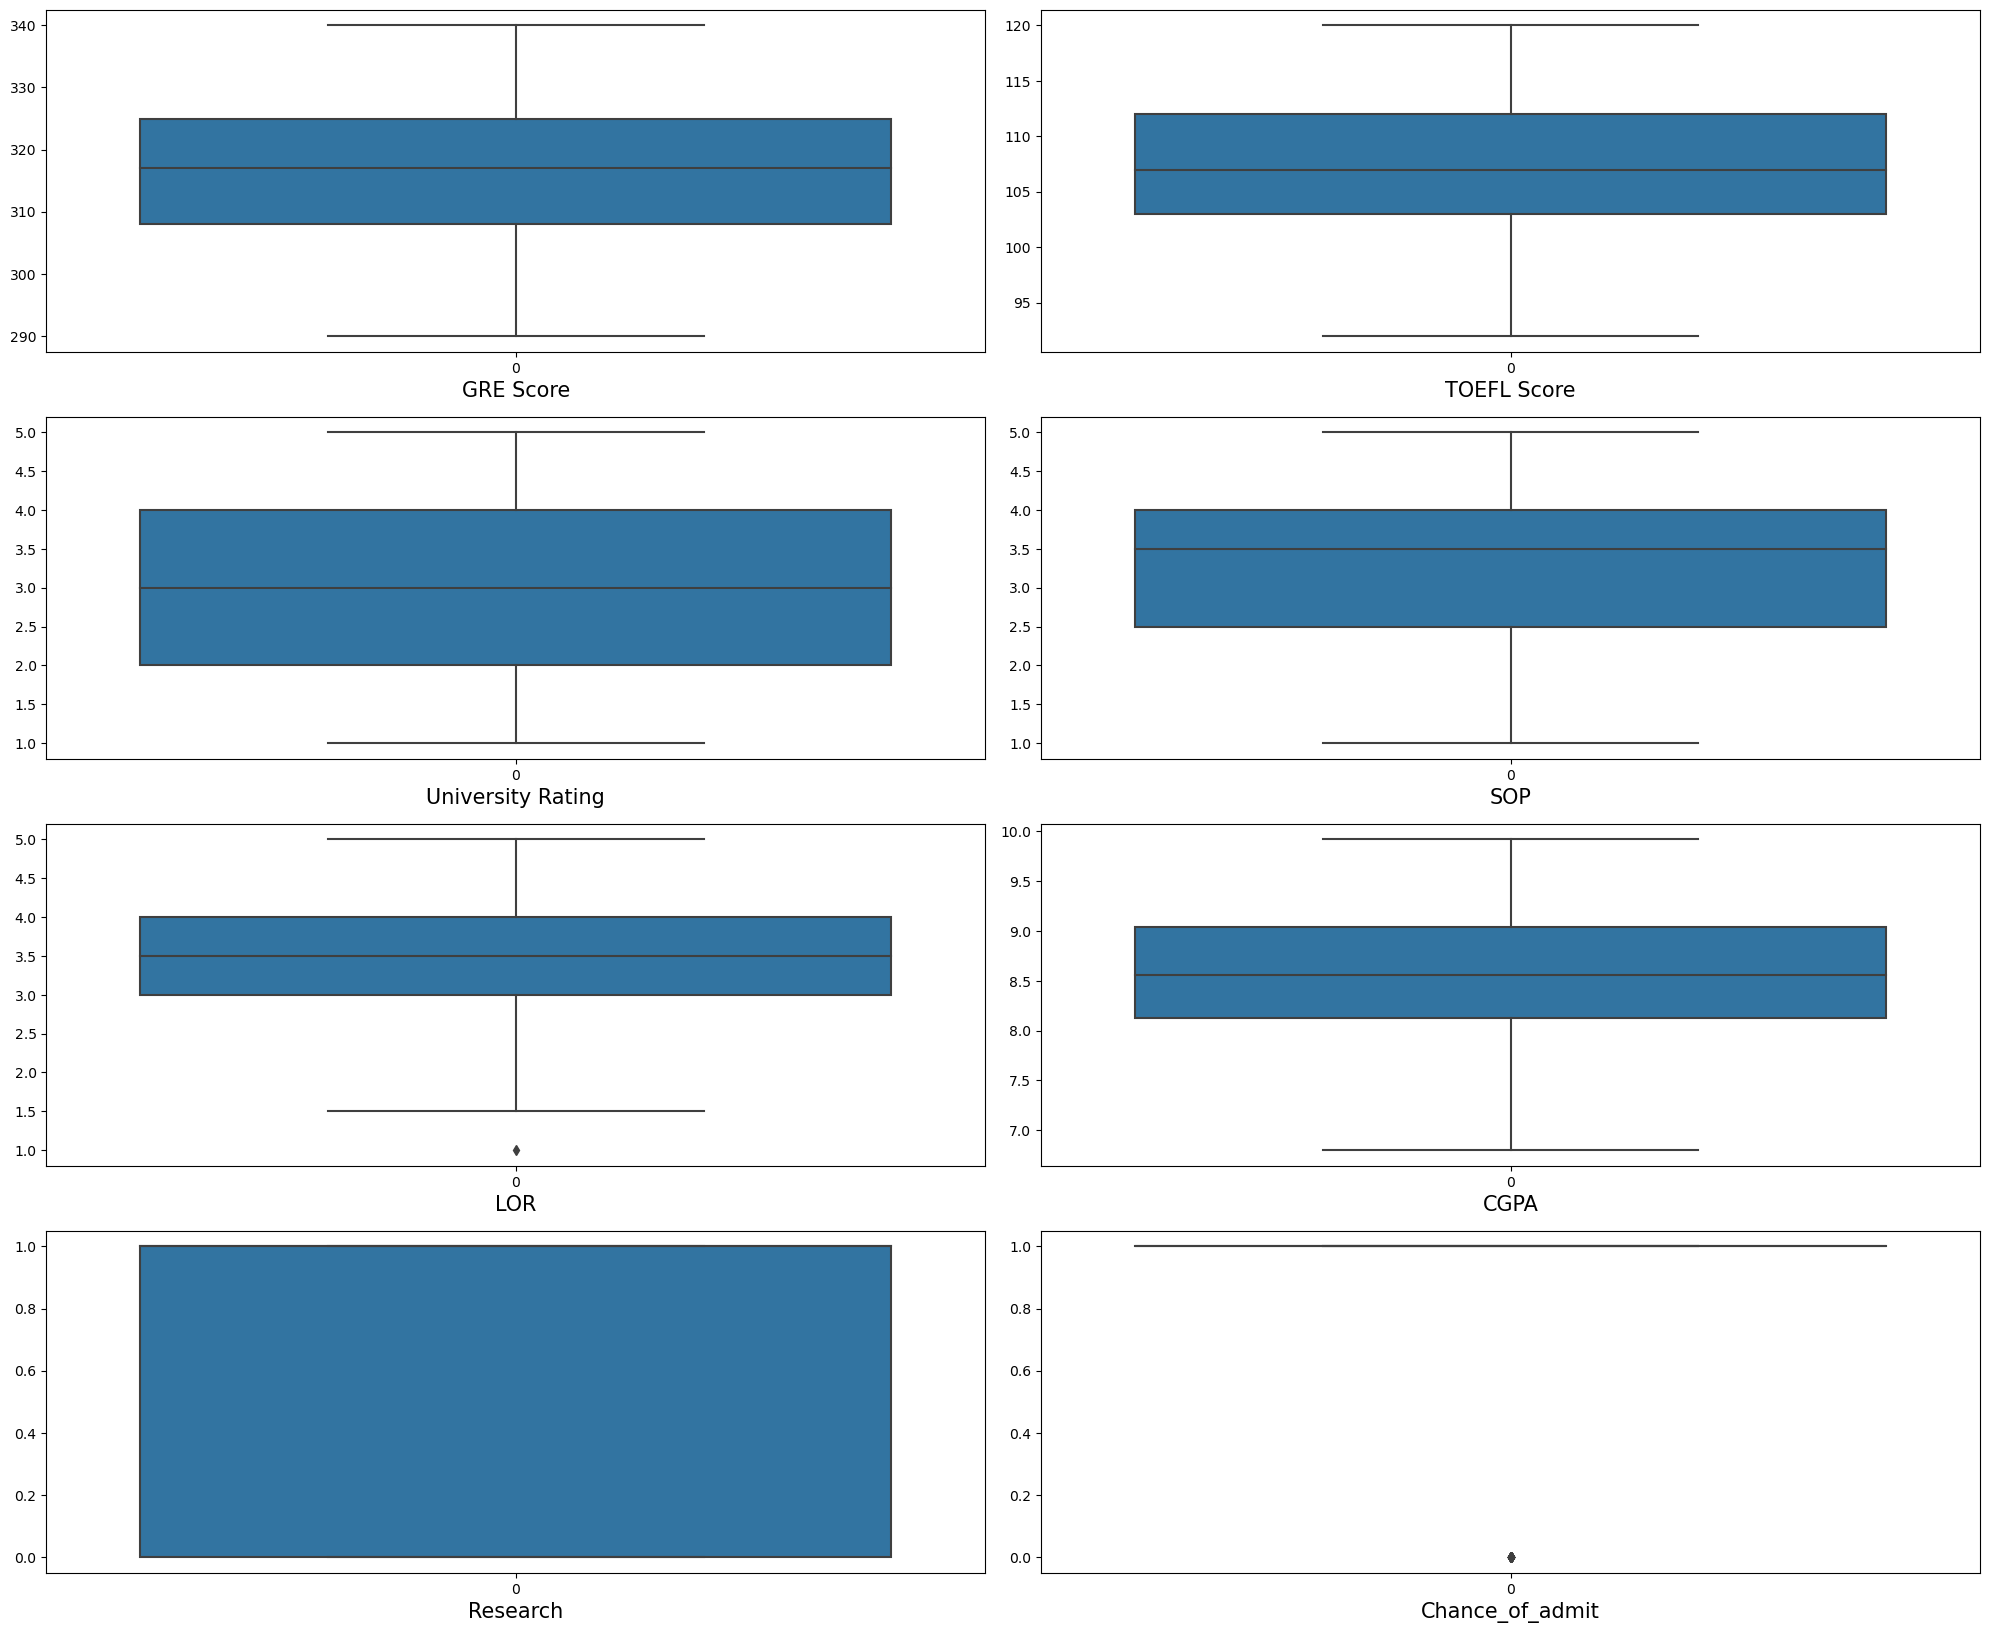

In [35]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now, data looks good and outliers are treated well.

In [36]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Chance_of_admit'])
y=data['Chance_of_admit']

In [37]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [38]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

        vif            featurs
0  4.464249          GRE Score
1  3.904213        TOEFL Score
2  2.621036  University Rating
3  2.835210                SOP
4  2.033555                LOR
5  4.777992               CGPA
6  1.494008           Research


No colinarity in the variables

In [39]:
print(x.shape)
print(y.shape)

(500, 7)
(500,)


In [40]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= i )
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =accuracy_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =accuracy_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.9514285714285714
at random sate 1, the testing accuracy is:- 0.94


at random sate 2, the training accuracy is:- 0.9514285714285714
at random sate 2, the testing accuracy is:- 0.94


at random sate 3, the training accuracy is:- 0.9514285714285714
at random sate 3, the testing accuracy is:- 0.94


at random sate 4, the training accuracy is:- 0.9514285714285714
at random sate 4, the testing accuracy is:- 0.94


at random sate 5, the training accuracy is:- 0.9514285714285714
at random sate 5, the testing accuracy is:- 0.94


at random sate 6, the training accuracy is:- 0.9514285714285714
at random sate 6, the testing accuracy is:- 0.94


at random sate 7, the training accuracy is:- 0.9542857142857143
at random sate 7, the testing accuracy is:- 0.9466666666666667


at random sate 8, the training accuracy is:- 0.9542857142857143
at random sate 8, the testing accuracy is:- 0.9466666666666667


at random sate 9, the training accuracy is:- 0.95428

In [41]:
rand_state

29

In [42]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= rand_state )

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 7)
(150, 7)
(350,)
(150,)


In [44]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE()
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 320, 0: 30})
Counter({1: 320, 0: 320})


# Lets Build The Model

In [45]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()


import xgboost as xgb
xgb=xgb.XGBClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', dt))
models.append(('AdaBoostClassifier', ada))
models.append(('GradientBoostingClassifier', gb))
models.append(('RandomForestClassifier', rfc))
models.append(('XGBClassifier', xgb))
models.append(('KNeighborsClassifier', knn))


In [46]:
m=[]
score=[]
score2=[]
cv_score=[]

for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=accuracy_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=accuracy_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    CR=classification_report(y_test,pred)
    print("classification report:",CR)
    CM=confusion_matrix(y_test,pred)
    print("confusion matrix:", CM)
      
    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LogisticRegression ***********************
LogisticRegression()
Train Report: 0.9571428571428572
Test Report: 0.9533333333333334
classification report:               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.97      0.98      0.98       141

    accuracy                           0.95       150
   macro avg       0.80      0.77      0.78       150
weighted avg       0.95      0.95      0.95       150

confusion matrix: [[  5   4]
 [  3 138]]
Accuracy: 92.00 %
Standard Deviation: 0.40 %


*********************** DecisionTreeClassifier ***********************
DecisionTreeClassifier()
Train Report: 1.0
Test Report: 0.9133333333333333
classification report:               precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.96      0.95      0.95       141

    accuracy                           0.91       150
   macro avg       0.6

In [47]:
print(len(m),len(score),len(score2),len(cv_score))

7 7 7 7


In [48]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score})
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score
0,LogisticRegression,95.714286,95.333333,92.0
1,DecisionTreeClassifier,100.000000,91.333333,90.6
2,AdaBoostClassifier,98.000000,92.666667,88.4
3,GradientBoostingClassifier,99.714286,92.666667,90.8
4,RandomForestClassifier,100.000000,94.000000,92.8
5,XGBClassifier,99.714286,92.000000,92.0
6,KNeighborsClassifier,95.428571,93.333333,92.2


In [49]:
result['least_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,least_diff
0,LogisticRegression,95.714286,95.333333,92.0,3.333333
1,DecisionTreeClassifier,100.000000,91.333333,90.6,0.733333
2,AdaBoostClassifier,98.000000,92.666667,88.4,4.266667
3,GradientBoostingClassifier,99.714286,92.666667,90.8,1.866667
4,RandomForestClassifier,100.000000,94.000000,92.8,1.200000
5,XGBClassifier,99.714286,92.000000,92.0,0.000000
6,KNeighborsClassifier,95.428571,93.333333,92.2,1.133333


From above we can see there are two models have least diffrance between crass validation score to test accuracy is XGBClassifier and DecisionTreeClassifier. But XGBClassifier has high accuracy 92% so i am selecting the XGBClassifier.

# HyperParameter Tuning

In [50]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09,0.009],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=xgb, cv=2,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 30, 'n_estimators': 7, 'learning_rate': 0.1}

In [51]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state= 20, n_estimators= 6, learning_rate= 0.09)
                          

ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=accuracy_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=ada.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("classification report:",CR)
CM=confusion_matrix(y_test,pred)
print("confusion matrix:", CM)
    
accuracies= cross_val_score(xgb,x, y, cv=2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 98.0
Test Report: 92.66666666666666
classification report:               precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.96      0.96      0.96       141

    accuracy                           0.93       150
   macro avg       0.68      0.70      0.69       150
weighted avg       0.93      0.93      0.93       150

confusion matrix: [[  4   5]
 [  6 135]]
Accuracy: 93.20 %
Standard Deviation: 0.80 %


As we seen the accuracy is increased by 1%. So, lets check with grid search CV as well.

In [52]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import GridSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09,0.0003],'random_state':[20,10,30]}
grid=GridSearchCV(estimator=ada, cv=2,param_grid=para)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 4, 'random_state': 20}

In [53]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state= 20, n_estimators= 4, learning_rate= 0.1)
                          

ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=accuracy_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=ada.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("classification report:",CR)
CM=confusion_matrix(y_test,pred)
print("confusion matrix:", CM)
    
accuracies= cross_val_score(xgb,x, y, cv=2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 98.0
Test Report: 92.66666666666666
classification report:               precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.96      0.96      0.96       141

    accuracy                           0.93       150
   macro avg       0.68      0.70      0.69       150
weighted avg       0.93      0.93      0.93       150

confusion matrix: [[  4   5]
 [  6 135]]
Accuracy: 93.40 %
Standard Deviation: 0.60 %


# So, Finally after hyper Tunning we see the better accuracy is with Gridsearch CV for XGBClassifier so i am selecting the same with 93.40%.

In [54]:
# Save Model
import pickle
file='Classi_Final_model.pickle'
model=pickle.dump(xgb,open(file,'wb'))